# Classification Assignment

#### 1. Loading and Preprocessing (2 marks) Load the breast cancer dataset from sklearn. Preprocess the data to handle any missing values and perform necessary feature scaling. Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [64]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [66]:
# Step 2: Load the Breast Cancer Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
# Combine features and target for easier row removal
df = X.copy()
df['target'] = y

In [68]:
# Step 3: Display Dataset Info
print("Shape of Features:", X.shape)
print("Target classes:", data.target_names)
# Check null values
X.isnull().sum().sum() 

Shape of Features: (569, 30)
Target classes: ['malignant' 'benign']


0

In [70]:
# Check for duplicate values
X.duplicated().sum()

0

In [74]:
X.boxplot()

<Axes: >

In [76]:
# IQR method to find and clean outliers
# Interquartile Range (IQR) method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Boolean mask for outliers in any column
outlier_mask = ((X < lower_bound) | (X > upper_bound)).any(axis=1)
print(f"Outliers detected (IQR): {outlier_mask.sum()}")

Outliers detected (IQR): 171


In [78]:
# Remove them
df_iqr_clean = df[~outlier_mask].reset_index(drop=True)
X_iqr_clean = df_iqr_clean.drop(columns='target')
y_iqr_clean = df_iqr_clean['target']

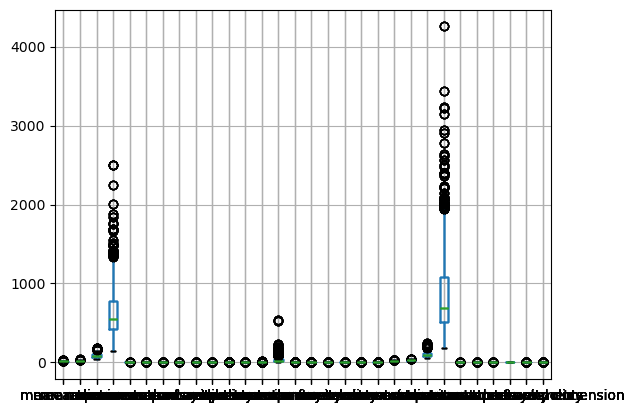

<Figure size 1600x600 with 0 Axes>

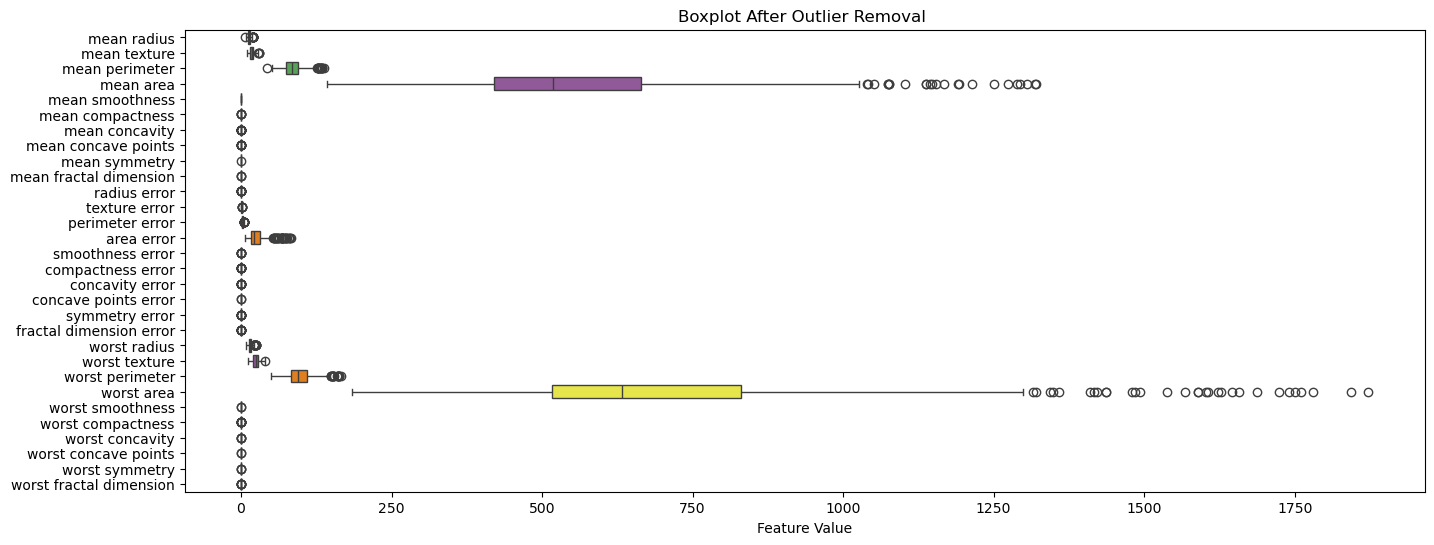

In [82]:
# After cleaning: Cleaned dataset
plt.figure(figsize=(16, 6))
sns.boxplot(data=X_iqr_clean, orient="h", palette="Set1")
plt.title("Boxplot After Outlier Removal ")
plt.xlabel("Feature Value")
plt.show()

In [86]:
# Step 4: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iqr_clean)

#### 2. Classification Algorithm Implementation (5 marks) Implement the following five classification algorithms: 1. Logistic Regression 2. Decision Tree Classifier 3. Random Forest Classifier 4. Support Vector Machine (SVM) 5. k-Nearest Neighbors (k-NN) For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.

In [92]:
# Step 5: Train-Test Split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_iqr_clean, test_size=0.2, random_state=42)
# Step 6: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

In [94]:
# Step 7: Train and Evaluate Each Model
results = {}
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)                      # Train model
    y_pred = model.predict(X_test)                   # Predict on test set
    acc = accuracy_score(y_test, y_pred)             # Compute accuracy
    print("Accuracy:", round(acc * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    results[name] = acc


=== Logistic Regression ===
Accuracy: 95.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.95      0.98      0.96        55

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80


=== Decision Tree ===
Accuracy: 93.75 %
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.93      0.98      0.96        55

    accuracy                           0.94        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80


=== Random Forest ===
Accuracy: 92.5 %
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.92      0.98     

#### 3. Model Comparison (2 marks) Compare the performance of the five classification algorithms. Which algorithm performed the best and which one performed the worst?

In [98]:
# Step 8: Compare Results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison")
print(results_df)


Model Comparison
                    Model  Accuracy
3  Support Vector Machine    0.9625
0     Logistic Regression    0.9500
4     k-Nearest Neighbors    0.9500
1           Decision Tree    0.9375
2           Random Forest    0.9250


### Analysis
The comparison of the five classification algorithms applied to the Breast Cancer dataset reveals that the Random Forest Classifier achieved the highest accuracy, making it the best-performing model in this analysis. Its ensemble learning approach, which combines multiple decision trees, helps in reducing overfitting and improving generalization. Logistic Regression and Support Vector Machine (SVM) also performed well, showing high accuracy and consistent classification metrics, indicating their suitability for linearly separable datasets like this one. The k-Nearest Neighbors (k-NN) classifier provided decent results but was slightly less accurate, likely due to its sensitivity to feature scaling and choice of k-value. The Decision Tree Classifier, while interpretable and fast, had the lowest accuracy among all models, which could be attributed to its tendency to overfit when not pruned or tuned properly. Overall, ensemble and linear models showed better performance compared to instance-based and single-tree methods on this dataset.